In [1]:
import pandas as pd

In [2]:
!ls ../../data/toutiao_news_cls

solution.csv test.csv     train.csv


In [3]:
content = pd.read_csv('../../data/toutiao_news_cls/train.csv')

In [4]:
len(content)

53360

In [5]:
content.head()

,id,label,label_desc,sentence
0,0,108,news_edu,上课时学生手机响个不停，老师一怒之下把手机摔了，家长拿发票让老师赔，大家怎么看待这种事？
1,1,104,news_finance,商赢环球股份有限公司关于延期回复上海证券交易所对公司2017年年度报告的事后审核问询函的公告
2,2,106,news_house,通过中介公司买了二手房，首付都付了，现在卖家不想卖了。怎么处理？
3,3,112,news_travel,2018年去俄罗斯看世界杯得花多少钱？
4,4,109,news_tech,剃须刀的个性革新，雷明登天猫定制版新品首发


In [11]:
# from collections import defaultdict

In [6]:
from collections import Counter

In [7]:
id_counter = Counter(content.label.values)

In [8]:
len(id_counter)

15

In [11]:
id_counter

Counter({108: 3437,
         104: 5200,
         106: 2107,
         112: 3368,
         109: 5955,
         103: 3991,
         116: 3390,
         101: 4081,
         107: 4118,
         100: 1111,
         102: 4976,
         110: 3632,
         115: 2886,
         113: 4851,
         114: 257})

In [10]:
for _id, value in id_counter.items():
    print(_id, value / len(content) * 100, '%')

108 6.441154422788606 %
104 9.745127436281859 %
106 3.948650674662669 %
112 6.31184407796102 %
109 11.160044977511244 %
103 7.479385307346327 %
116 6.353073463268366 %
101 7.648050974512744 %
107 7.717391304347826 %
100 2.0820839580209896 %
102 9.325337331334332 %
110 6.806596701649176 %
115 5.408545727136431 %
113 9.091079460269864 %
114 0.48163418290854576 %


15分类的问题，Model 是work的，请问。你model在测试集上，准确度，最起码需要时多少？

In [12]:
content[content['label'] == 109]

,id,label,label_desc,sentence
4,4,109,news_tech,剃须刀的个性革新，雷明登天猫定制版新品首发
6,6,109,news_tech,三农盾SACC-全球首个推出：互联网+区块链+农产品的电商平台
10,10,109,news_tech,凌云研发的国产两轮电动车怎么样，有什么惊喜？
33,33,109,news_tech,小白如何做好自媒体的几个信念？
44,44,109,news_tech,听说最近联通搅乱了北京宽带市场价格，比小运营商的还低？
...,...,...,...,...
53316,53316,109,news_tech,微软亚研院洪小文：今天的AI只是一个黑盒
53323,53323,109,news_tech,分辨OPPO真假，只需输入几个代码，就知道手机是真假
53330,53330,109,news_tech,小米估值连遭下调：最低至600亿美元，较早期削减近4成
53339,53339,109,news_tech,宝贝钱袋成就您的创业梦


In [13]:
content['sentence_len'] = content['sentence'].apply(len)

In [14]:
import matplotlib.pyplot as plt

In [15]:
import numpy as np

In [16]:
np.max(content['sentence_len'])

145

In [17]:
np.mean(content['sentence_len'])

22.13124062968516

In [18]:
np.std(content['sentence_len'])

7.3097918579505325

In [20]:
np.where(content['sentence_len'] < 22 + 7.3 * 1.5)

(array([    2,     3,     4, ..., 53357, 53358, 53359]),)

In [21]:
np.where(content['sentence_len'] < 22 + 7.3 * 1.5)[0]

array([    2,     3,     4, ..., 53357, 53358, 53359])

In [19]:
len(np.where(content['sentence_len'] < 22 + 7.3 * 1.5)[0]) / len(content)

0.9512368815592204

(array([2.200e+01, 6.210e+02, 2.313e+03, 4.475e+03, 5.769e+03, 6.698e+03,
        6.917e+03, 4.824e+03, 7.290e+03, 9.416e+03, 2.974e+03, 9.350e+02,
        5.870e+02, 3.000e+02, 1.140e+02, 4.600e+01, 3.500e+01, 1.000e+01,
        6.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,   4.86,   7.72,  10.58,  13.44,  16.3 ,  19.16,  22.02,
         24.88,  27.74,  30.6 ,  33.46,  36.32,  39.18,  42.04,  44.9 ,
         47.76,  50.62,  53.48,  56.34,  59.2 ,  62.06,  64.92,  67.78,
         70.64,  73.5 ,  76.36,  79.22,  82.08,  84.94,  87.8 ,  90.66,
         93.52,  96.38,  99.24, 102.1 , 104.96, 107.82, 110.68, 113.54,
        116.4 , 

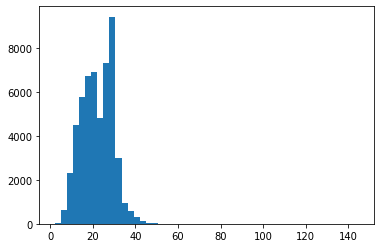

In [22]:
plt.hist(content['sentence_len'], bins=50)

## 我们为什么要关注这个长度呢？ 

### model -> x 向量化 
### 加速计划：[t1x, t2x, ... tNx] x向量的长度就一定得一样
### 极端情况：所有的长度就按照最短那个文章来
###  如何我们把所有的x向量的长度按照最长的长度来，会引发什么问题？

w *  x + b => 参数特别多 => 过拟合就会变严重！！！！

In [23]:
import jieba

In [24]:
def cut(string): return list(jieba.cut(string))

In [25]:
content['words'] = content['sentence'].apply(lambda s: ' '.join(cut(s)))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/19/dgxwsbgd76728hx577833nx00000gn/T/jieba.cache
Loading model cost 1.150 seconds.
Prefix dict has been built successfully.


In [26]:
content['words_len'] = content['words'].apply(lambda s: len(s.split()))

In [27]:
words_len = content['words_len']

In [28]:
np.mean(words_len)

12.76617316341829

In [29]:
np.std(words_len)

4.533920842261766

In [30]:
np.max(words_len)

81

In [31]:
len(np.where(words_len <= 20)[0]) / len(content)

0.9625187406296851

(array([5.200e+01, 9.590e+02, 1.305e+03, 4.840e+03, 3.254e+03, 7.498e+03,
        8.194e+03, 3.936e+03, 7.620e+03, 3.794e+03, 6.459e+03, 3.449e+03,
        7.860e+02, 6.690e+02, 1.700e+02, 2.520e+02, 7.400e+01, 1.400e+01,
        2.500e+01, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ,
        18.6, 20.2, 21.8, 23.4, 25. , 26.6, 28.2, 29.8, 31.4, 33. , 34.6,
        36.2, 37.8, 39.4, 41. , 42.6, 44.2, 45.8, 47.4, 49. , 50.6, 52.2,
        53.8, 55.4, 57. , 58.6, 60.2, 61.8, 63.4, 65. , 66.6, 68.2, 69.8,
        71.4, 73. , 74.6, 76.2, 77.8, 79.4, 81. ]),
 <BarContainer object of 50 

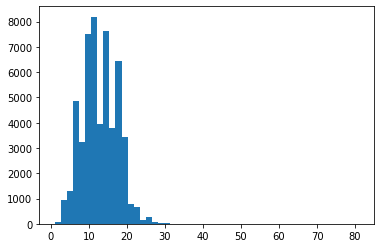

In [32]:
plt.hist(content['words_len'], bins=50)

In [33]:
content['words_keep'] = content['words'].apply(lambda s: ' '.join(s.split()[:20]))

In [34]:
content.to_csv('train_after_analysis.csv')

In [35]:
from functools import reduce

In [36]:
sentences = content['words_keep'].tolist()

In [37]:
sentences = list(map(lambda s: s.split(), sentences))

In [38]:
sentences

[['上课时',
  '学生',
  '手机',
  '响个',
  '不停',
  '，',
  '老师',
  '一怒之下',
  '把',
  '手机',
  '摔',
  '了',
  '，',
  '家长',
  '拿',
  '发票',
  '让',
  '老师',
  '赔',
  '，'],
 ['商赢',
  '环球',
  '股份',
  '有限公司',
  '关于',
  '延期',
  '回复',
  '上海证券交易所',
  '对',
  '公司',
  '2017',
  '年',
  '年度报告',
  '的',
  '事后',
  '审核',
  '问询',
  '函',
  '的',
  '公告'],
 ['通过',
  '中介',
  '公司',
  '买',
  '了',
  '二手房',
  '，',
  '首付',
  '都',
  '付',
  '了',
  '，',
  '现在',
  '卖家',
  '不想',
  '卖',
  '了',
  '。',
  '怎么',
  '处理'],
 ['2018', '年', '去', '俄罗斯', '看', '世界杯', '得花', '多少', '钱', '？'],
 ['剃须刀', '的', '个性', '革新', '，', '雷明登', '天猫', '定制', '版', '新品', '首发'],
 ['再次',
  '证明',
  '了',
  '“',
  '无敌',
  '是',
  '多么',
  '寂寞',
  '”',
  '—',
  '—',
  '逆天',
  '的',
  '中国乒乓球队',
  '！'],
 ['三农',
  '盾',
  'SACC',
  '-',
  '全球',
  '首个',
  '推出',
  '：',
  '互联网',
  '+',
  '区块',
  '链',
  '+',
  '农产品',
  '的',
  '电商',
  '平台'],
 ['重做', 'or', '新', '英雄', '？', '其实', '重做', '对', '暴雪', '来说', '同样', '重要'],
 ['如何', '在', '商业活动', '中不受', '人', '欺骗', '？'],
 ['87',
  '版',
  '红楼梦',
  '最

## func: reduce(func, list, [init])

In [39]:
all_words = reduce(lambda a, b: a + b, sentences)

In [40]:
words_count = Counter(all_words)

In [41]:
sorted(words_count.values(), reverse=True)

[34665,
 23205,
 21634,
 9332,
 7684,
 6694,
 5824,
 5551,
 5471,
 4839,
 4042,
 3987,
 3686,
 3059,
 2930,
 2790,
 2679,
 2481,
 2447,
 2260,
 2175,
 2137,
 2130,
 2127,
 2125,
 1840,
 1769,
 1757,
 1755,
 1698,
 1601,
 1477,
 1457,
 1441,
 1440,
 1415,
 1399,
 1291,
 1272,
 1271,
 1267,
 1256,
 1255,
 1251,
 1234,
 1232,
 1184,
 1180,
 1173,
 1064,
 1060,
 1005,
 996,
 988,
 981,
 981,
 980,
 972,
 969,
 928,
 926,
 924,
 913,
 906,
 885,
 871,
 863,
 852,
 847,
 844,
 838,
 819,
 818,
 813,
 810,
 808,
 807,
 789,
 780,
 775,
 739,
 731,
 725,
 720,
 717,
 711,
 710,
 695,
 686,
 672,
 660,
 659,
 645,
 641,
 630,
 630,
 628,
 628,
 623,
 621,
 613,
 610,
 610,
 606,
 596,
 592,
 581,
 580,
 580,
 575,
 567,
 565,
 564,
 564,
 561,
 551,
 542,
 538,
 535,
 523,
 521,
 516,
 492,
 485,
 481,
 480,
 472,
 471,
 471,
 471,
 466,
 464,
 464,
 463,
 463,
 459,
 457,
 456,
 447,
 441,
 441,
 436,
 436,
 434,
 431,
 430,
 417,
 417,
 416,
 416,
 415,
 414,
 414,
 409,
 406,
 406,
 403,
 40

In [42]:
sorted(words_count.items(), key=lambda kv: kv[1], reverse=True)[:300]

[('，', 34665),
 ('？', 23205),
 ('的', 21634),
 ('！', 9332),
 ('：', 7684),
 ('了', 6694),
 ('是', 5824),
 ('“', 5551),
 ('”', 5471),
 ('你', 4839),
 ('有', 4042),
 ('在', 3987),
 ('吗', 3686),
 ('什么', 3059),
 ('中国', 2930),
 ('为什么', 2790),
 ('如何', 2679),
 ('都', 2481),
 ('和', 2447),
 ('人', 2260),
 ('怎么', 2175),
 ('《', 2137),
 ('被', 2130),
 ('不', 2127),
 ('》', 2125),
 ('、', 1840),
 ('会', 1769),
 ('对', 1757),
 ('我', 1755),
 ('美国', 1698),
 ('年', 1601),
 ('上', 1477),
 ('—', 1457),
 ('看', 1441),
 ('最', 1440),
 ('能', 1415),
 ('这', 1399),
 ('一个', 1291),
 ('要', 1272),
 ('好', 1271),
 ('还', 1267),
 ('就', 1256),
 ('将', 1255),
 ('后', 1251),
 ('与', 1234),
 ('大', 1232),
 ('中', 1184),
 ('让', 1180),
 ('哪些', 1173),
 ('5', 1064),
 ('他', 1060),
 ('世界', 1005),
 ('却', 996),
 ('去', 988),
 ('新', 981),
 ('到', 981),
 ('月', 980),
 ('2018', 972),
 ('谁', 969),
 ('可以', 928),
 ('多', 926),
 ('说', 924),
 ('也', 913),
 ('又', 906),
 ('上联', 885),
 ('个', 871),
 ('来', 863),
 ('网友', 852),
 ('如果', 847),
 ('手机', 844),
 ('下联', 838),
 ('

In [43]:
stopwords = [w for w, _ in sorted(words_count.items(), key=lambda kv: kv[1], reverse=True)[:300]]

In [45]:
with open('./stopwords.txt', 'w') as f:
    for w in stopwords:
        f.write(w + '\n')

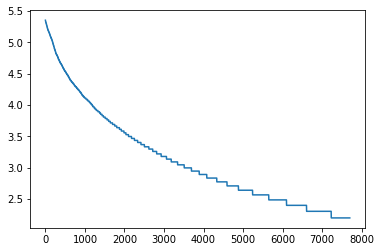

In [46]:
plt.plot(list(map(lambda n: np.log(n), sorted(words_count.values(), reverse=True)[300:8000])))